<ipython-input-11-2add600dc217>:14: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(binary)
<ipython-input-11-2add600dc217>:24: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem = browser.find_element_by_xpath("//*[@class='gLFyf gsfi']")
<ipython-input-11-2add600dc217>:40: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  browser.find_element_by_xpath("//body").send_keys(Keys.END)


['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCcQL6KGr63rqvfpm9UdDz9VyRd-jBeFZ3rg&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTwqXHViK0jCTkuLSOBTAIeHslVvT-d6lQQSw&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSZtP88A_XFayJInortVJp0PB8pEbl7pa_gw&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSsOtLCxhCDcg5abAk2OQi-9UtBgNEUZNMSkA&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJ_YZncgO1eiOHW5V-kwx8mxLC_0tS0hCmoQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsO-GV92U4j_M_pTpNE7OX1AS2BcIKrWSVNQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7m-nbctRfKrbcogpadhY23X8szO3ABVIa5Q&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkL2Blf_BKAO1pPWk5_eqavq5dLp3bYqpycw&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdhcirOEEdKIakVdvmzwXryG2vt5PjhMdl-Q&usq
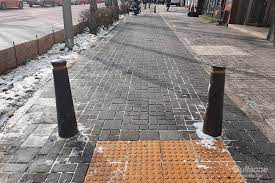
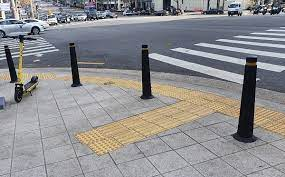
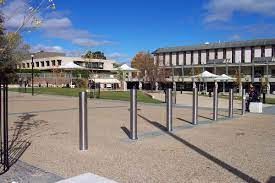
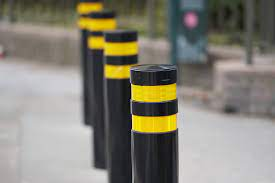
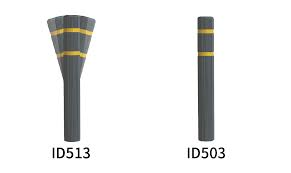
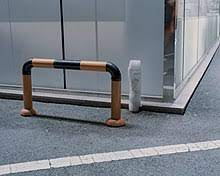
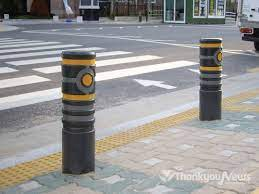
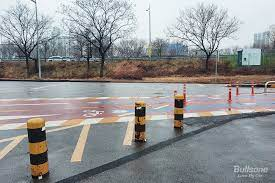
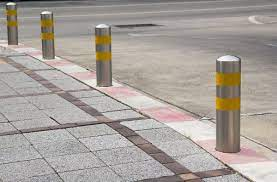
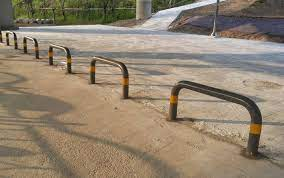
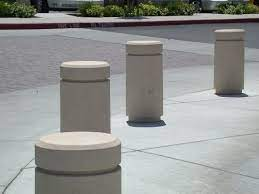
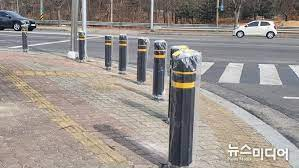
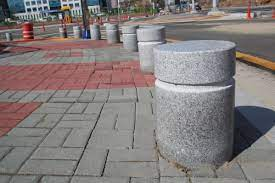
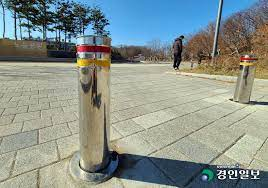
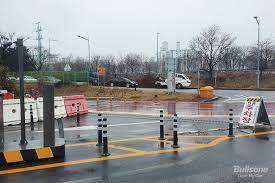
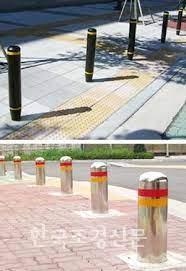
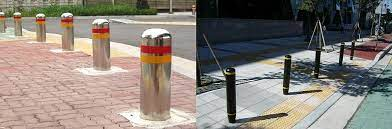
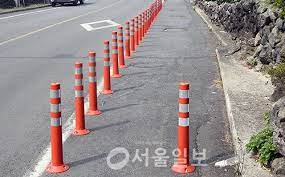
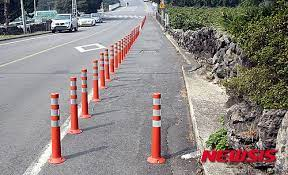
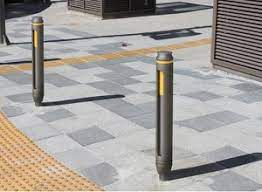

In [11]:
import urllib.request #웹 url을 파이썬이 인식할 수 있게하는 패키지
from  bs4 import BeautifulSoup #html에서 데이터 검색을 용이하게 하는 패키지
from selenium import webdriver  # 웹 애플리케이션의 테스트를 자동화하기 위한 프레임 워크
from selenium.webdriver.common.keys import Keys #손으로 클릭하는것을 컴퓨터가 대신
import time                     # 중간중간 sleep 을 걸어야 해서 time 모듈 import
                                #스크롤링하게 하는 패키지
########################### url 받아오기 ###########################

# 웹브라우져로 크롬을 사용할거라서 크롬 드라이버를 다운받아 위의 위치에 둔다
# 팬텀 js로 하면 백그라운드로 실행할 수 있음
binary = 'C:\chromedriver/chromedriver.exe'

# 브라우져를 인스턴스화
browser = webdriver.Chrome(binary)

# 구글의 이미지 검색 url 받아옴(아무것도 안 쳤을때의 url)
browser.get("https://www.google.co.kr/imghp?hl=ko&tab=ri&ogbl")

# 구글의 이미지 검색에 해당하는 input 창의 id 가 '  ?  ' 임(검색창에 해당하는 html코드를 찾아서 elem 사용하도록 설정)
# input창 찾는 방법은 원노트에 있음

#elem = browser.find_elements_by_class_name('gLFyf gsfi')

elem = browser.find_element_by_xpath("//*[@class='gLFyf gsfi']") 



########################### 검색어 입력 ###########################

# elem 이 input 창과 연결되어 스스로 안내견을 검색
elem.send_keys("볼라드")

# 웹에서의 submit 은 엔터의 역할을 함
elem.submit()

########################### 반복할 횟수 ###########################

# 스크롤을 내리려면 브라우져 이미지 검색결과 부분(바디부분)에 마우스 클릭 한번 하고 End키를 눌러야함
for i in range(1, 3):
    browser.find_element_by_xpath("//body").send_keys(Keys.END)
    time.sleep(10)                  # END 키 누르고 내려가는데 시간이 걸려서 sleep 해줌

time.sleep(10)                      # 네트워크 느릴까봐 안정성 위해 sleep 해줌
html = browser.page_source         # 크롬브라우져에서 현재 불러온 소스 가져옴
soup = BeautifulSoup(html, "lxml") # html 코드를 검색할 수 있도록 설정


########################### 그림파일 저장 ###########################


def fetch_list_url():
    params = []
    imgList = soup.find_all("img", class_="rg_i Q4LuWd")  # 구글 이미지 url 이 있는 img 태그의 _img 클래스에 가서
    for im in imgList:
        try :
            params.append(im["src"])                   # params 리스트에 image url 을 담음
        except KeyError:
            params.append(im["data-src"])
    return params

# 이미지의 상세 url 의 값이 있는 src 가 없을 경우
# data-src 로 가져오시오 ~ 


def fetch_detail_url():
    params = fetch_list_url()
    print(params)
    for idx,p in enumerate(params,1):
        
        # 다운받을 폴더경로 입력
        urllib.request.urlretrieve(p, "C:/bollard/" + str(idx) + ".jpg")
        

# enumerate 는 리스트의 모든 요소를 인덱스와 쌍으로 추출
# 하는 함수 . 숫자 1은 인덱스를 1부터 시작해라 ~

fetch_detail_url()

# 끝나면 브라우져 닫기
browser.quit()



In [10]:
import  cv2
import  os 
import  numpy  as np

path = "C:/bollard" #원본 사진이 있는 폴더 위치

file_list = os.listdir(path)
    
for k in file_list:
    img = cv2.imread(path + '\\' + k)
    width, height = img.shape[:2]
    resize_img = cv2.resize(img, (416 , 416), interpolation=cv2.INTER_CUBIC) #사진크기
    cv2.imwrite('C:/bollard_resize\\' + k, resize_img)  #리사이즈된 후 사진이 저장될 폴더 위치